In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
df =  pd.read_csv('data\OBRIO Test task data - tickets.csv')
df

,ticket_id,request_datetime,agent,agent_team,request_type,reply_time,satisfaction_score
0,426981,2024-05-31 23:59,Jim,Team 1,Product 1,84,Unoffered
1,426980,2024-05-31 23:57,Trevor,Team 1,Product 1,90,Offered
2,426979,2024-05-31 23:56,Trevor,Team 1,Other,93,Unoffered
3,426978,2024-05-31 23:55,Jim,Team 1,Other,14,Unoffered
4,426977,2024-05-31 23:55,Fate,Team 1,Other,37,Unoffered
...,...,...,...,...,...,...,...
46866,378447,2024-05-01 0:06,Tracy,Team 3,Product 1,510,Offered
46867,378446,2024-05-01 0:05,Jeff,Team 3,Tech issue,380,Unoffered
46868,378445,2024-05-01 0:04,Dwight,Team 1,Product 1,90,Offered
46869,378444,2024-05-01 0:03,Charles,Team 3,Tech issue,305,Unoffered


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46871 entries, 0 to 46870
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ticket_id           46871 non-null  int64 
 1   request_datetime    46871 non-null  object
 2   agent               46030 non-null  object
 3   agent_team          46871 non-null  object
 4   request_type        46871 non-null  object
 5   reply_time          46871 non-null  object
 6   satisfaction_score  46871 non-null  object
dtypes: int64(1), object(6)
memory usage: 2.5+ MB


In [4]:
df["request_type"].unique()

array(['Product 1 ', 'Other', 'Empty', 'Tech issue', 'Product 2 ',
       'Non-customer', 'Email Marketing', 'Customer Success',
       'Personal data deletion', 'Feedback/suggestion'], dtype=object)

In [5]:
sizes = np.array([df.query('request_type == "{}"'.format(lebel)).shape[0] for lebel in df["request_type"].unique()])
sizes = sizes / sum(sizes)
sizes = sizes[:5]

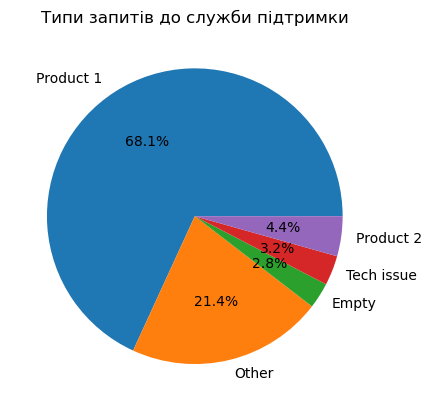

In [6]:
fig, ax = plt.subplots()
ax.pie(sizes, labels=df["request_type"].unique()[:5], autopct='%1.1f%%')
plt.title("Типи запитів до служби підтримки")
plt.show()

In [7]:
time = {}
for t in df["request_datetime"]:
    t1 = pd.to_datetime(t).day
    time[t1] = 1 if t1 not in time else time[t1] + 1

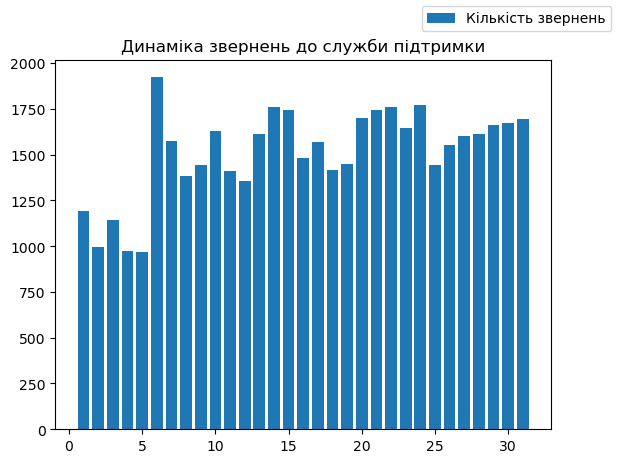

In [8]:
fig, ax = plt.subplots()
ax.bar(time.keys(), time.values())
fig.legend(["Кількість звернень"])
plt.title("Динаміка звернень до служби підтримки")
plt.show()

In [9]:
df["request_datetime"] = pd.to_datetime(df["request_datetime"])
df.head()

,ticket_id,request_datetime,agent,agent_team,request_type,reply_time,satisfaction_score
0,426981,2024-05-31 23:59:00,Jim,Team 1,Product 1,84,Unoffered
1,426980,2024-05-31 23:57:00,Trevor,Team 1,Product 1,90,Offered
2,426979,2024-05-31 23:56:00,Trevor,Team 1,Other,93,Unoffered
3,426978,2024-05-31 23:55:00,Jim,Team 1,Other,14,Unoffered
4,426977,2024-05-31 23:55:00,Fate,Team 1,Other,37,Unoffered


In [10]:
df["agent_team"].unique()

array(['Team 1 ', ' ', 'Team 2 ', 'Team 3 '], dtype=object)

In [11]:
no_reply = df.query("agent_team == ' '")
no_reply

,ticket_id,request_datetime,agent,agent_team,request_type,reply_time,satisfaction_score
7,426974,2024-05-31 23:54:00,NaN,,Empty,,Unoffered
44,426932,2024-05-31 23:27:00,NaN,,Product 1,,Offered
70,426906,2024-05-31 23:11:00,NaN,,Empty,,Unoffered
89,426887,2024-05-31 23:00:00,NaN,,Product 1,,Offered
94,426882,2024-05-31 22:59:00,NaN,,Product 1,,Offered
...,...,...,...,...,...,...,...
46811,378504,2024-05-01 00:46:00,NaN,,Empty,,Offered
46815,378499,2024-05-01 00:43:00,NaN,,Empty,,Unoffered
46817,378496,2024-05-01 00:42:00,NaN,,Product 1,,Offered
46834,378479,2024-05-01 00:32:00,NaN,,Product 2,,Offered


In [12]:
no_reply.size / df.size

0.017942864457767063

In [13]:
df.drop(no_reply.index, inplace=True)

In [14]:
df["agent"].unique()

array(['Jim', 'Trevor', 'Fate', 'Dwight', 'Scott', 'Harry', 'Matheo',
       'Leo', 'Markus', 'Holly', 'Sophia', 'Orianna', 'Vito', 'Dan',
       'Zoe', 'Quentin', 'Irene', 'Dean', 'Max', 'Emma', 'Nathan',
       'Oscar', 'Jeff', 'John', 'Steve', 'Lisa', 'Tracy', 'James', 'Luc',
       'Lily', 'Eva', 'Dylan', 'Bella', 'Tina', 'Charles', 'Nicole',
       'Jessica', 'April', 'Goldie', 'Permanently deleted user'],
      dtype=object)

In [15]:
df.query("agent == 'Permanently deleted user'")

,ticket_id,request_datetime,agent,agent_team,request_type,reply_time,satisfaction_score
46690,378627,2024-05-01 02:22:00,Permanently deleted user,Team 3,Other,398,Unoffered


In [16]:
df["satisfaction_score"].unique()

array(['Unoffered', 'Offered', 'Good with Comment', 'Bad with Comment',
       'Good', 'Bad'], dtype=object)

In [292]:
sizes = np.array([df.query('satisfaction_score== "{}"'.format(lebel)).shape[0] for lebel in df["satisfaction_score"].unique()])
sizes = sizes / sum(sizes)
sizes = sizes

lebels = df["satisfaction_score"].unique()

In [198]:
sizes[1]

0.7455572452748208

Не пройшли опитування 92 відсотки

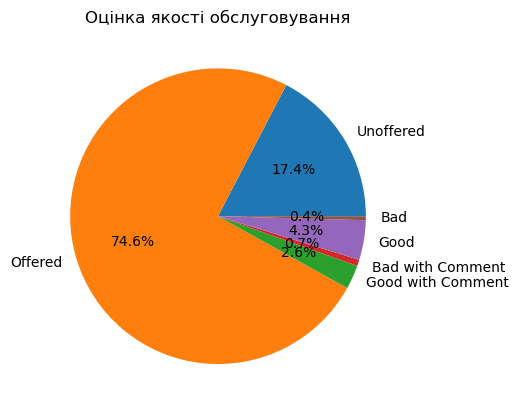

In [294]:
fig, ax = plt.subplots()
ax.pie(sizes, labels=df["satisfaction_score"].unique(), autopct='%1.1f%%')
plt.title("Оцінка якості обслуговування")
plt.show()

In [196]:
grades = sizes[2:]
grades = grades / sum(grades)

In [197]:
grades[0] + grades[2]

0.8629400698736899

Позитивних оцінок - 86%

In [201]:
df.query("reply_time > '90'").shape[0] / df.shape[0]

0.031240495329133176

In [223]:
df.query("reply_time > '90' and (satisfaction_score == 'Bad' or satisfaction_score == 'Bad with Comment')").shape[0] / df.query("reply_time > '90' and (satisfaction_score == 'Good' or satisfaction_score == 'Bad' or satisfaction_score == 'Good with Comment' or satisfaction_score == 'Bad with Comment')").shape[0] * 100

12.903225806451612

In [221]:
df.query("reply_time > '90' and (satisfaction_score == 'Good' or satisfaction_score == 'Good with Comment')")

,ticket_id,request_datetime,agent,agent_team,request_type,reply_time,satisfaction_score
1341,425591,2024-05-31 05:00:00,Fate,Team 1,Product 1,93,Good
1916,424986,2024-05-30 21:23:00,Scott,Team 1,Product 1,94,Good
2409,424472,2024-05-30 15:26:00,Scott,Team 1,Product 1,94,Good with Comment
2511,424367,2024-05-30 13:54:00,Scott,Team 1,Product 1,96,Good
3051,423800,2024-05-30 04:25:00,Scott,Team 1,Product 1,94,Good with Comment
...,...,...,...,...,...,...,...
42597,382918,2024-05-04 23:21:00,Scott,Team 1,Product 1,93,Good
42749,382765,2024-05-04 20:01:00,Dwight,Team 1,Product 1,95,Good
44240,381210,2024-05-03 11:45:00,Harry,Team 1,Product 1,96,Good with Comment
46234,379103,2024-05-01 12:51:00,Harry,Team 1,Product 1,91,Good with Comment


In [319]:
sizes = np.array([df.query('agent_team== "{}"'.format(lebel)).shape[0] for lebel in df["agent_team"].unique()])
sizes = sizes * 100

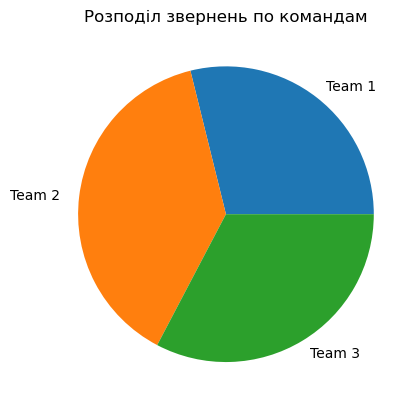

In [320]:
fig, ax = plt.subplots()
ax.pie(sizes, labels=df["agent_team"].unique())
plt.title("Розподіл звернень по командам")
plt.show()

Text(0.5, 1.0, 'Кількість агентів з відповідними відсотками задоволеності клієнтів')

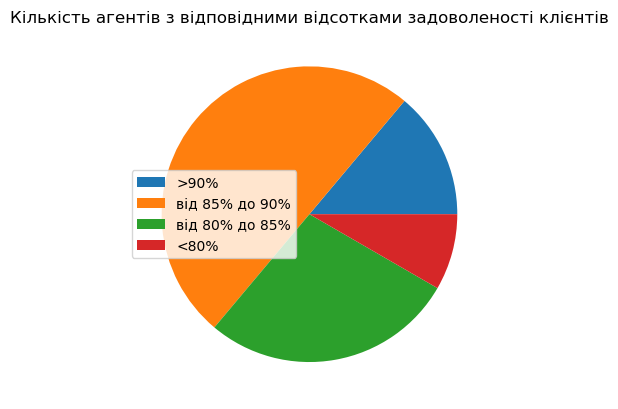

In [326]:
plt.pie([5, 18, 10, 3])
plt.legend(labels=[">90%", "від 85% до 90%", "від 80% до 85%", "<80%"])
plt.title("Кількість агентів з відповідними відсотками задоволеності клієнтів")

In [270]:
sizes = np.array([df.query('agent== "{}"'.format(lebel)).shape[0] for lebel in df.query('agent_team== "{}"'.format('Team 1 '))["agent"].unique()])
lebels = df.query('agent_team== "{}"'.format('Team 1 '))["agent"].unique()
sizes = sizes
sizes

array([1019, 2433, 1562, 1133, 3040, 1501, 1101,  583,  915])

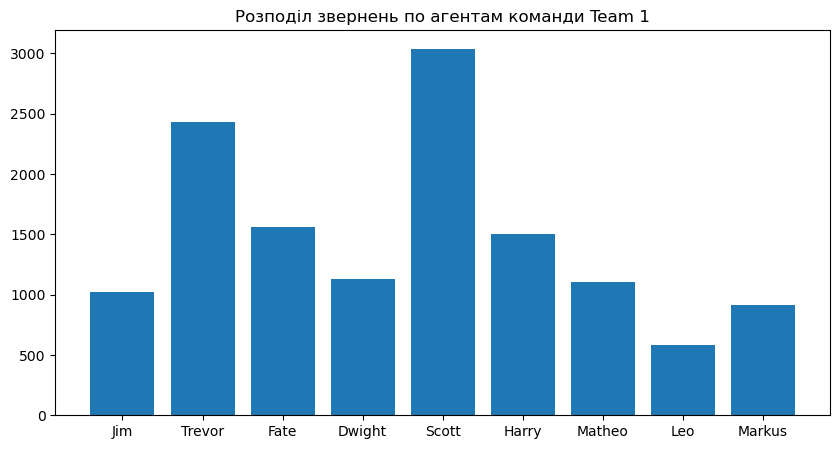

In [271]:
fig = plt.figure(figsize = (10, 5))
plt.bar(lebels, sizes)
plt.title("Розподіл звернень по агентам команди Team 1")
#plt.legend()
plt.show()

In [272]:
sizes = np.array([df.query('agent== "{}"'.format(lebel)).shape[0] for lebel in df.query('agent_team== "{}"'.format('Team 2 '))["agent"].unique()])
lebels = df.query('agent_team== "{}"'.format('Team 2 '))["agent"].unique()
sizes

array([1065,  945,  703,  868, 1036, 1250, 1177,  241, 1551, 2436,  891,
       2500, 3030])

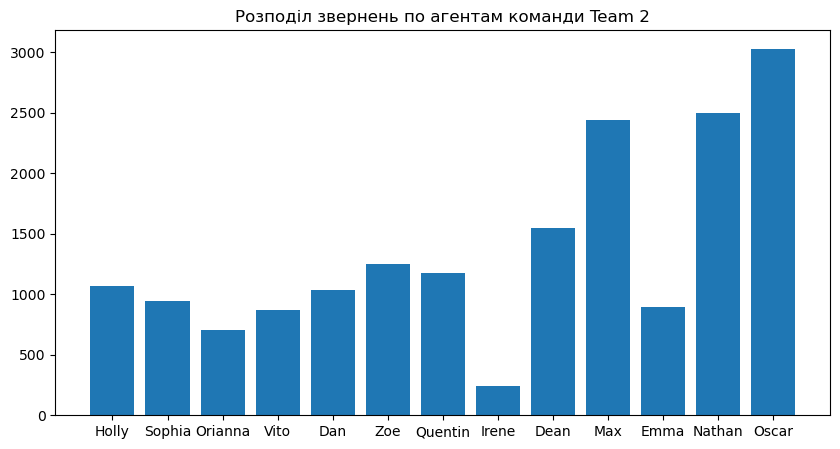

In [273]:
fig = plt.figure(figsize = (10, 5))
plt.bar(lebels, sizes)
plt.title("Розподіл звернень по агентам команди Team 2")
#plt.legend()
plt.show()

In [274]:
sizes = np.array([df.query('agent== "{}"'.format(lebel)).shape[0] for lebel in df.query('agent_team== "{}"'.format('Team 3 '))["agent"].unique()])
lebels = df.query('agent_team== "{}"'.format('Team 3 '))["agent"].unique()
sizes

array([1742,  777, 1490,  996,  540,  860, 1414, 1300, 1280,  883, 1551,
        243, 1353,   96,   76,  422,   26,    1])

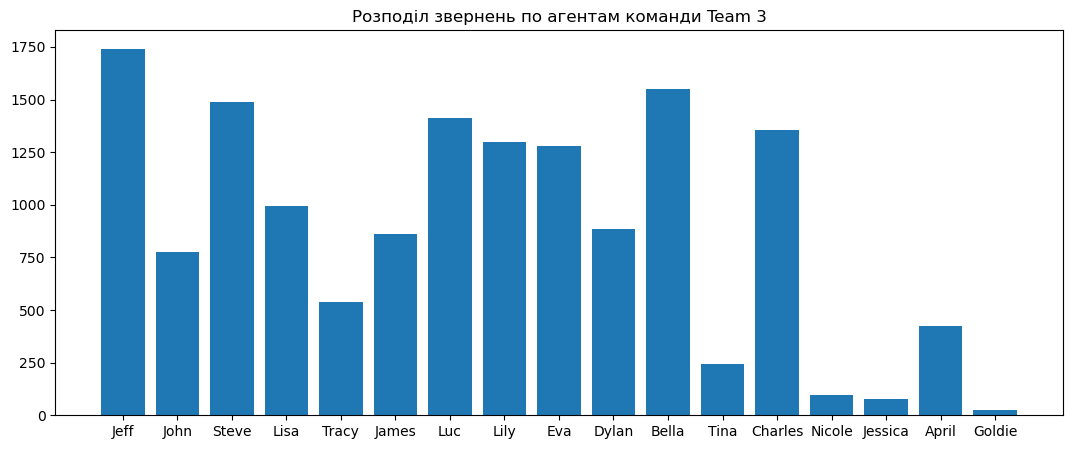

In [275]:
fig = plt.figure(figsize = (13, 5))
plt.bar(lebels[:-1], sizes[:-1])
plt.title("Розподіл звернень по агентам команди Team 3")
#plt.legend()
plt.show()

In [182]:
good_t1 = df.query(" agent_team == 'Team 1 'and (satisfaction_score== 'Good' or satisfaction_score== 'Good with Comment')").groupby("agent")["satisfaction_score"].count()
bad_t1 = df.query(" agent_team == 'Team 1 'and (satisfaction_score== 'Bad' or satisfaction_score== 'Bad with Comment')").groupby("agent")["satisfaction_score"].count()
good_t2 = df.query(" agent_team == 'Team 2 'and (satisfaction_score== 'Good' or satisfaction_score== 'Good with Comment')").groupby("agent")["satisfaction_score"].count()
bad_t2 = df.query(" agent_team == 'Team 2 'and (satisfaction_score== 'Bad' or satisfaction_score== 'Bad with Comment')").groupby("agent")["satisfaction_score"].count()
good_t3 = df.query(" agent_team == 'Team 3 'and (satisfaction_score== 'Good' or satisfaction_score== 'Good with Comment')").groupby("agent")["satisfaction_score"].count()
bad_t3 = df.query(" agent_team == 'Team 3 'and (satisfaction_score== 'Bad' or satisfaction_score== 'Bad with Comment')").groupby("agent")["satisfaction_score"].count()

In [224]:
stats1 =good_t1 / (good_t1 + bad_t1)
stats1

agent
Dwight    0.890625
Fate      0.826446
Harry     0.890511
Jim       0.829545
Leo       0.789474
Markus    0.897727
Matheo    0.886364
Scott     0.832727
Trevor    0.875000
Name: satisfaction_score, dtype: float64

In [225]:
stats2 = good_t2 / (good_t2 + bad_t2)
stats2

agent
Dan        0.873239
Dean       0.887931
Emma       0.898551
Holly      0.895833
Irene      0.777778
Max        0.833333
Nathan     0.858491
Orianna    0.962264
Oscar      0.839806
Quentin    0.810345
Sophia     0.937500
Vito       0.826087
Zoe        0.871795
Name: satisfaction_score, dtype: float64

In [241]:
stats3 = good_t3 / (good_t3 + bad_t3)
stats3

agent
April      0.825000
Bella      0.741176
Charles    0.899160
Dylan      0.866667
Eva        0.857143
Goldie          NaN
James      0.964286
Jeff       0.877863
Jessica    0.833333
John       0.902778
Lily       0.838710
Lisa       0.868421
Luc        0.851852
Nicole          NaN
Steve      0.923664
Tina       0.888889
Tracy           NaN
Name: satisfaction_score, dtype: float64

In [234]:
sum(stats1>=0.8) + sum(stats2>=0.8) + sum(stats3>=0.8)

33

In [229]:
sum(stats1<0.9) + sum(stats2<0.9) + sum(stats3<0.9)

31

In [288]:
all_t1 = df.query(" agent_team == 'Team 1 '").groupby("agent")["request_datetime"].count()
bad_t1 = df.query(" agent_team == 'Team 1 'and (satisfaction_score== 'Bad' or satisfaction_score== 'Bad with Comment')").groupby("agent")["satisfaction_score"].count()
all_t2 = df.query(" agent_team == 'Team 2 '").groupby("agent")["request_datetime"].count()
bad_t2 = df.query(" agent_team == 'Team 2 'and (satisfaction_score== 'Bad' or satisfaction_score== 'Bad with Comment')").groupby("agent")["satisfaction_score"].count()
all_t3 = df.query(" agent_team == 'Team 3 '").groupby("agent")["request_datetime"].count()
bad_t3 = df.query(" agent_team == 'Team 3 'and (satisfaction_score== 'Bad' or satisfaction_score== 'Bad with Comment')").groupby("agent")["satisfaction_score"].count()

In [289]:
stats1 =bad_t1 / all_t1 * 100
stats1

agent
Dwight    0.617829
Fate      1.344430
Harry     0.999334
Jim       1.472031
Leo       1.372213
Markus    0.983607
Matheo    0.908265
Scott     1.513158
Trevor    1.315249
dtype: float64

In [290]:
stats2 =bad_t2 / all_t2 * 100
stats2

agent
Dan        0.868726
Dean       0.838169
Emma       0.785634
Holly      0.938967
Irene      3.319502
Max        1.518883
Nathan     1.200000
Orianna    0.284495
Oscar      1.089109
Quentin    1.869159
Sophia     0.529101
Vito       1.382488
Zoe        1.200000
dtype: float64

In [291]:
stats3 =bad_t3 / all_t3 * 100
stats3

agent
April                       1.658768
Bella                       1.418440
Charles                     0.886918
Dylan                       1.359003
Eva                         0.937500
Goldie                           NaN
James                       0.116279
Jeff                        0.918485
Jessica                     2.631579
John                        0.900901
Lily                        1.153846
Lisa                        1.004016
Luc                         1.131542
Nicole                           NaN
Permanently deleted user         NaN
Steve                       0.671141
Tina                        0.823045
Tracy                            NaN
dtype: float64

In [244]:
df.query("agent == 'Irene'")

,ticket_id,request_datetime,agent,agent_team,request_type,reply_time,satisfaction_score
79,426897,2024-05-31 23:05:00,Irene,Team 2,Customer Success,24,Offered
91,426885,2024-05-31 23:00:00,Irene,Team 2,Customer Success,16,Offered
97,426879,2024-05-31 22:58:00,Irene,Team 2,Customer Success,34,Offered
569,426389,2024-05-31 17:41:00,Irene,Team 2,Customer Success,31,Unoffered
1314,425618,2024-05-31 05:27:00,Irene,Team 2,Customer Success,2,Offered
...,...,...,...,...,...,...,...
45816,379536,2024-05-01 20:54:00,Irene,Team 2,Customer Success,19,Offered
45823,379529,2024-05-01 20:45:00,Irene,Team 2,Customer Success,15,Good
45841,379511,2024-05-01 20:26:00,Irene,Team 2,Customer Success,20,Good with Comment
45879,379472,2024-05-01 19:47:00,Irene,Team 2,Customer Success,33,Offered


In [237]:
3 / 36 * 100

8.333333333333332

In [264]:
df.query("(satisfaction_score == 'Bad' or satisfaction_score == 'Bad with Comment')").groupby("agent")["satisfaction_score"].count().sort_values(ascending=False)

agent
Scott      46
Max        37
Oscar      33
Trevor     32
Nathan     30
Bella      22
Quentin    22
Fate       21
Luc        16
Jeff       16
Lily       15
Jim        15
Zoe        15
Harry      15
Dean       13
Eva        12
Dylan      12
Vito       12
Charles    12
Holly      10
Lisa       10
Matheo     10
Steve      10
Dan         9
Markus      9
Leo         8
Irene       8
John        7
Emma        7
Dwight      7
April       7
Sophia      5
Orianna     2
Jessica     2
Tina        2
James       1
Name: satisfaction_score, dtype: int64

In [269]:
df.groupby("agent")["request_datetime"].count().sort_values(ascending=False)

agent
Scott                       3040
Oscar                       3030
Nathan                      2500
Max                         2436
Trevor                      2433
Jeff                        1742
Fate                        1562
Dean                        1551
Bella                       1551
Harry                       1501
Steve                       1490
Luc                         1414
Charles                     1353
Lily                        1300
Eva                         1280
Zoe                         1250
Quentin                     1177
Dwight                      1133
Matheo                      1101
Holly                       1065
Dan                         1036
Jim                         1019
Lisa                         996
Sophia                       945
Markus                       915
Emma                         891
Dylan                        883
Vito                         868
James                        860
John                         777
Oria

In [246]:
df.query("(satisfaction_score == 'Bad' or satisfaction_score == 'Bad with Comment')").shape[0]

510

In [248]:
22 / 510 * 100

4.313725490196078

In [295]:
df.head(3)

,ticket_id,request_datetime,agent,agent_team,request_type,reply_time,satisfaction_score
0,426981,2024-05-31 23:59:00,Jim,Team 1,Product 1,84,Unoffered
1,426980,2024-05-31 23:57:00,Trevor,Team 1,Product 1,90,Offered
2,426979,2024-05-31 23:56:00,Trevor,Team 1,Other,93,Unoffered


In [299]:
(df.query("reply_time > '90'").groupby("agent")["reply_time"].count() / df.groupby("agent")["request_datetime"].count()).sort_values(ascending=False) * 100

agent
Leo                         9.948542
Scott                       9.671053
Trevor                      9.617756
Markus                      9.617486
Fate                        9.218950
Dwight                      9.002648
Harry                       8.860759
Jim                         8.537782
Matheo                      7.175295
Jessica                     3.947368
Tracy                       2.037037
Luc                         1.768034
Bella                       1.740812
Charles                     1.699926
Lily                        1.538462
James                       1.511628
April                       1.421801
Steve                       1.409396
Dylan                       1.359003
Jeff                        1.262916
Eva                         1.250000
Nicole                      1.041667
John                        1.029601
Lisa                        1.004016
Tina                        0.411523
Dan                              NaN
Dean                            

In [305]:
df["request_datetime"] = df["request_datetime"].dt.hour

In [317]:
(df.query("(satisfaction_score == 'Bad' or satisfaction_score == 'Bad with Comment' )").groupby("request_datetime")["satisfaction_score"].count()/510 * 100 ).sort_values(ascending=False)

request_datetime
20    6.274510
19    6.274510
23    6.078431
21    5.882353
1     5.686275
18    5.294118
17    5.294118
16    5.294118
22    5.098039
15    5.098039
0     4.705882
7     3.921569
6     3.725490
3     3.725490
9     3.333333
2     3.333333
11    3.137255
5     2.941176
14    2.745098
8     2.745098
10    2.549020
13    2.549020
12    2.549020
4     1.764706
Name: satisfaction_score, dtype: float64

In [318]:
(df.groupby("request_datetime")["satisfaction_score"].count()).sort_values(ascending=False)

request_datetime
23    2947
18    2650
17    2535
20    2398
21    2370
19    2369
0     2283
22    2257
16    2204
1     2186
15    1969
14    1830
2     1766
3     1694
4     1584
13    1571
11    1568
5     1454
6     1444
9     1442
12    1427
8     1381
10    1364
7     1337
Name: satisfaction_score, dtype: int64

In [315]:
sum(df.query("(satisfaction_score == 'Bad' or satisfaction_score == 'Bad with Comment' )").groupby("request_datetime")["satisfaction_score"].count())

510

In [ ]:
1438